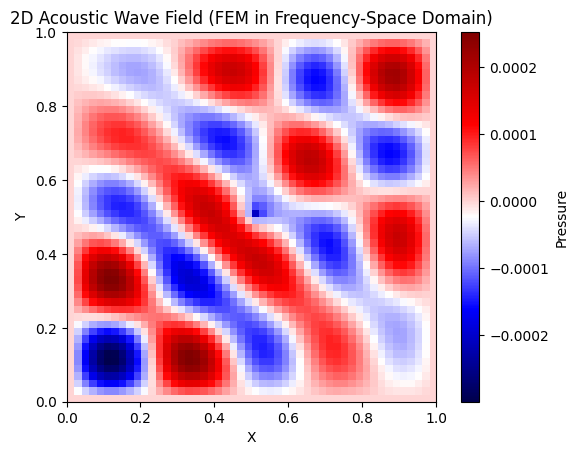

In [2]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla

def solve_acoustic_wave_equation_fem(n, k, f):
    """
    2D Acoustic Wave Equation Solver using FEM in frequency-space domain.
    n: number of grid points in one dimension (n x n grid).
    k: wave number.
    f: source function as an n x n numpy array.
    Returns the pressure field P as an n x n numpy array.
    """
    # Generate grid
    h = 1.0 / (n - 1)  # grid spacing
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)
    X, Y = np.meshgrid(x, y)

    # Assembly of stiffness matrix (Laplacian operator) and mass matrix
    laplacian = (sp.diags([4, -1, -1, -1, -1], [0, -1, 1, -n, n], shape=(n*n, n*n))
                 / h**2)
    mass = sp.eye(n*n) * k**2

    # System matrix
    A = laplacian - mass

    # Apply fixed boundary conditions by removing degrees of freedom at the boundaries
    boundary_indices = np.hstack([np.arange(0, n), np.arange(n*(n-1), n*n), 
                                  np.arange(0, n*n, n), np.arange(n-1, n*n, n)])
    A = A.tolil()
    A[boundary_indices] = 0
    A[boundary_indices, boundary_indices] = 1
    f = f.flatten()
    f[boundary_indices] = 0

    # Solve the linear system
    P = spla.spsolve(A.tocsc(), f)

    # Reshape solution to 2D
    P = P.reshape((n, n))

    return P

# Example usage
n = 50  # grid size
k = 20  # wave number
f = np.zeros((n, n))
f[n//2, n//2] = -1  # source at the center

P = solve_acoustic_wave_equation_fem(n, k, f)

# Plotting
import matplotlib.pyplot as plt

plt.imshow(P, extent=[0, 1, 0, 1], origin='lower', cmap='seismic')
plt.colorbar(label='Pressure')
plt.title('2D Acoustic Wave Field (FEM in Frequency-Space Domain)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
